## Parte 3 - Regressão - iFood

---
<img align="center" width="150" src="https://logodownload.org/wp-content/uploads/2017/05/ifood-logo-0.png">

# Carregando a base de dados

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
df_orders = pd.read_csv('/content/drive/MyDrive/FIA Analytics/ML/2 - Introdução ao Machine Learning/IFOOD/df_orders.csv', parse_dates=['order_timestamp_local'])
df_orders.head(3)

,order_id,order_number,order_timestamp_local,order_shift,last_status_date_local,order_total,credit,paid_amount,delivery_type,scheduled,...,distance_merchant_customer,promo_is_promotion,normal_items_quantity,promo_items_quantity,order_lag_at_login,order_lead_at_login,order_date_local,valid_order,session_id,customer_id
0,630e2af0-b456-4b3a-b964-4d66ce5cc5df,1290139943,2019-12-11 13:22:06.497000+00:00,weekday lunch,2019-12-11T15:22:39.156Z,28.90,14.0,24.9,DELIVERY,False,...,2722.603906,0.0,2.0,0.0,2.0,1.0,2019-12-11T00:00:00.000Z,1,ccbcf9e2-3728-4458-a813-4031ae22e4bd,48b6d81407646ca61163f064a426ce38ac08bed2ce84f0...
1,66f8163d-f081-4fbd-adb8-cfbbff9213f7,1141271215,2019-11-06 17:57:17.967000+00:00,weekday dinner,2019-11-06T18:18:48.680Z,56.35,7.9,50.4,DELIVERY,False,...,1108.823183,1.0,0.0,1.0,7.0,1.0,2019-11-06T00:00:00.000Z,1,d9e94d88-ca88-4997-ad4c-62b9c0a35c1b,b3f74186880f5f9a79e0865ad8beab47e22b785b8b3bc0...
2,e8c55557-81d4-4159-bd2b-c144e5fbabe3,694742752,2019-06-11 20:42:32.058000+00:00,weekday dinner,2019-06-11T22:42:54.005Z,53.80,4.0,49.8,DELIVERY,False,...,1642.258522,0.0,2.0,0.0,5.0,1.0,2019-06-11T00:00:00.000Z,1,035b33cd-6ddf-4ee2-a887-7ba490bb9700,c4f8999d4cb83cac8134b2051ffc611d5d660c049c3744...


In [4]:
df_orders.shape

(492138, 43)

# Criação da ABT


### Agregando receita por dia

**`Q1`** Crie um DataFrame chamado `df` que deverá somar o valor total dos pedidos. Utilize a variável `order_timestamp_local` para recuperar a data. Faça o agrupamento por dia e por fim faça a ordenação do menor para o maior.

O resultado esperado é um DataFrame com duas colunas (`order_date` e `receita`).

| order_date 	| receita   	|
|-----------:	|-----------	|
| 2019-06-01 	| 209061.01 	|
| 2019-06-02 	| 213995.65 	|
| 2019-06-03 	| 108973.96 	|


In [5]:
df = (
    df_orders
    .assign(order_date = df_orders["order_timestamp_local"].dt.date)
    .groupby("order_date")
    .agg(receita = ("order_total","sum"))
    .reset_index()
    .sort_values("order_date")
)
df.head()

,order_date,receita
0,2019-06-01,209061.01
1,2019-06-02,213995.65
2,2019-06-03,108973.96
3,2019-06-04,106973.23
4,2019-06-05,122957.05


In [6]:
df.dtypes

,0
order_date,object
receita,float64


**`Q1.1`** Faça um plot da série temporal. Utilize o método `.plot()`.

In [7]:
df.shape

(214, 2)

<Axes: >

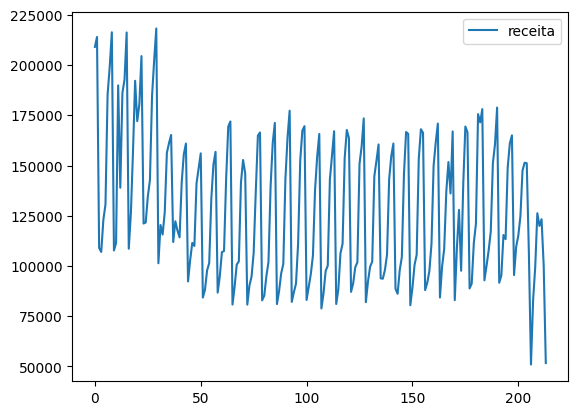

In [8]:
df.plot()

In [9]:
#df[0:31].plot() <--- fiar a lista so que é um dataframe

<Axes: >

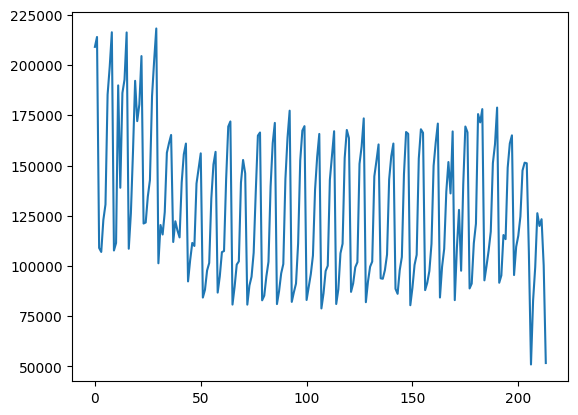

In [10]:
df["receita"].plot()

### Train-Test Split

**`Q2`** Crie dois dataframes: `df_train` com dados de junho até novembro e `df_test` com dados de dezembro.

In [11]:
df.agg({"order_date":["min","max"]})

,order_date
min,2019-06-01
max,2019-12-31


In [12]:
df["order_date"] = pd.to_datetime(df["order_date"])
df.dtypes

,0
order_date,datetime64[ns]
receita,float64


In [13]:
df_train = df.query("order_date<'2019-12-01'")
df_test = df.query("order_date>='2019-12-01'")

In [14]:
df_train.shape, df_test.shape

((183, 2), (31, 2))

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - A resposta do exercício deverá ser:

`df_train` deverá ter 183 linhas e `df_test` deverá ter 31 linhas.

### Feature Engineering

#### Variáveis Sazonais

**`Q3`** Crie as seguintes variáveis sazonais para ambos os DataFrames `df_train` e `df_test`:
- `mes`: mês
- `dia`: dia do mês
- `weekday`: dia da semana
- `dayofyear`: dia do ano

In [15]:
df_train= (
    df_train
    .assign(mes = df_train["order_date"].dt.month)
    .assign(dia = df_train["order_date"].dt.day)
    .assign(weekday = df_train["order_date"].dt.weekday)
    .assign(dayofyear = df_train["order_date"].dt.dayofyear)
)
df_train.head()

,order_date,receita,mes,dia,weekday,dayofyear
0,2019-06-01,209061.01,6,1,5,152
1,2019-06-02,213995.65,6,2,6,153
2,2019-06-03,108973.96,6,3,0,154
3,2019-06-04,106973.23,6,4,1,155
4,2019-06-05,122957.05,6,5,2,156


In [16]:
df_test= (
    df_test
    .assign(mes = df_test["order_date"].dt.month)
    .assign(dia = df_test["order_date"].dt.day)
    .assign(weekday = df_test["order_date"].dt.weekday)
    .assign(dayofyear = df_test["order_date"].dt.dayofyear)
)
df_test.head()

,order_date,receita,mes,dia,weekday,dayofyear
183,2019-12-01,178085.12,12,1,6,335
184,2019-12-02,92833.10,12,2,0,336
185,2019-12-03,99995.42,12,3,1,337
186,2019-12-04,107698.24,12,4,2,338
187,2019-12-05,117057.18,12,5,3,339


#### Variáveis Lag

**`Q4`** Crie as seguintes variáveis de lag para ambos os DataFrames `df_train` e `df_test`:

- `receita_atual`: receita do dia em que a previsão é feita
- `receita_anterior`: receita do dia anterior ao dia em que a previsão é feita
- `diff_receitas`: diferença de receita do dia atual para o dia anterios

Utilize o método `.shift()` da coluna `df['receita']`.  O método `shift()` é utilizada para deslocar o índice pelo número desejado de períodos com uma frequencia de tempo opcional.




In [17]:
# Antes de testar o comando .shift(n)
df['receita'][:4]

,receita
0,209061.01
1,213995.65
2,108973.96
3,106973.23


In [18]:
# Depois de testar o comando .shift(1)
df['receita'][:4].shift(1)

,receita
0,NaN
1,209061.01
2,213995.65
3,108973.96


In [19]:
# Depois de testar o comando .shift(2)
df['receita'][:4].shift(2)

,receita
0,NaN
1,NaN
2,209061.01
3,213995.65


In [20]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_train:
df_train= (
    df_train
    .assign(receita_atual = df_train["receita"].shift(1))
    .assign(receita_anterior = df_train["receita"].shift(2))
    .assign(diff_receitas = lambda df_train: df_train["receita_atual"] - df_train["receita_anterior"])
)
df_train.head()

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas
0,2019-06-01,209061.01,6,1,5,152,NaN,NaN,NaN
1,2019-06-02,213995.65,6,2,6,153,209061.01,NaN,NaN
2,2019-06-03,108973.96,6,3,0,154,213995.65,209061.01,4934.64
3,2019-06-04,106973.23,6,4,1,155,108973.96,213995.65,-105021.69
4,2019-06-05,122957.05,6,5,2,156,106973.23,108973.96,-2000.73


In [21]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_test:
df_test= (
    df_test
    .assign(receita_atual = df_test["receita"].shift(1))
    .assign(receita_anterior = df_test["receita"].shift(2))
    .assign(diff_receitas = lambda df_test: df_test["receita_atual"] - df_test["receita_anterior"])
)
df_test.head()

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas
183,2019-12-01,178085.12,12,1,6,335,NaN,NaN,NaN
184,2019-12-02,92833.10,12,2,0,336,178085.12,NaN,NaN
185,2019-12-03,99995.42,12,3,1,337,92833.10,178085.12,-85252.02
186,2019-12-04,107698.24,12,4,2,338,99995.42,92833.10,7162.32
187,2019-12-05,117057.18,12,5,3,339,107698.24,99995.42,7702.82


In [22]:
df_train.shape, df_test.shape

((183, 9), (31, 9))

#### Média Móvel dos últimos 3 dias

**`Q5`** Cria uma variável que representa a média móvel dos últimos 3 dias anteriores ao dia de previsão para ambos os DataFrames `df_train` e `df_test`.

- `media_movel`: média móvel dos últimos 3 dias.

Utilize o método `.rolling(3)` que possibilita realizar cálculos para uma determinada janela deslizante. O valor 3, significa o tamanho da janela que será utilizada para deslizar.


In [23]:
df_train['receita_atual'][:9]

,receita_atual
0,NaN
1,209061.01
2,213995.65
3,108973.96
4,106973.23
5,122957.05
6,130615.30
7,185314.25
8,199144.33


In [24]:
df_train['receita_atual'][:9].rolling(3)

Rolling [window=3,center=False,axis=0,method=single]

In [25]:
df_train['receita_atual'][:9].rolling(3).mean()

,receita_atual
0,NaN
1,NaN
2,NaN
3,177343.540000
4,143314.280000
5,112968.080000
6,120181.860000
7,146295.533333
8,171691.293333


In [26]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_train:
df_train= (
    df_train
    .assign(media_movel = df_train["receita_atual"].rolling(3).mean())
)
df_train.head()

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas,media_movel
0,2019-06-01,209061.01,6,1,5,152,NaN,NaN,NaN,NaN
1,2019-06-02,213995.65,6,2,6,153,209061.01,NaN,NaN,NaN
2,2019-06-03,108973.96,6,3,0,154,213995.65,209061.01,4934.64,NaN
3,2019-06-04,106973.23,6,4,1,155,108973.96,213995.65,-105021.69,177343.54
4,2019-06-05,122957.05,6,5,2,156,106973.23,108973.96,-2000.73,143314.28


In [27]:
# Adicione seu codigo aqui para criar as variáveis solicitadas no exercício para o df_test:
df_test= (
    df_test
    .assign(media_movel = df_test["receita_atual"].rolling(3).mean())
)
df_test.head()

,order_date,receita,mes,dia,weekday,dayofyear,receita_atual,receita_anterior,diff_receitas,media_movel
183,2019-12-01,178085.12,12,1,6,335,NaN,NaN,NaN,NaN
184,2019-12-02,92833.10,12,2,0,336,178085.12,NaN,NaN,NaN
185,2019-12-03,99995.42,12,3,1,337,92833.10,178085.12,-85252.02,NaN
186,2019-12-04,107698.24,12,4,2,338,99995.42,92833.10,7162.32,123637.880000
187,2019-12-05,117057.18,12,5,3,339,107698.24,99995.42,7702.82,100175.586667


# Modelagem
Iremos testar diferentes algoritmos de regressão para o problema em questão.

## Criando os conjuntos de treino e teste

**`Q6`** Crie os seguintes dataframes selecionando apenas as colunas `['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']` como **features** e a coluna `receita` como **target**. Remova todas as linhas com valores faltantes.

- `X_train`
- `X_test`
- `y_train`
- `y_test`

In [28]:
features= ['mes', 'dia', 'weekday', 'dayofyear', 'receita_atual', 'receita_anterior', 'diff_receitas', 'media_movel']
target = "receita"

Remova os valores faltantes `.dropna()` existentes que foram criados na parte de Feature Engineering e faça a filtragem correspondente utilizando as variáveis `features` e `target`.

In [29]:
X_train = df_train.dropna().filter(features).copy()
y_train = df_train.dropna()[target].copy()

X_test = df_test.dropna().filter(features).copy()
y_test = df_test.dropna()[target].copy()

In [30]:
X_train.shape, y_train.shape

((180, 8), (180,))

In [31]:
X_test.shape, y_test.shape

((28, 8), (28,))

<img align="left" width="20" src="http://dinomagri.com/imgs/checkpoint.png" />  **CHECKPOINT** - Verifique a quantidade de linhas e colunas para as variáveis `X_train`, `X_test`, `y_train` e `y_test`:

    X_train - (180, 8)
    y_train - (180,)

    X_test - (28, 8)
    y_test - (28,)


## Regressão Linear

**`Q7`** Treine uma regressão linear para o conjunto de treino e salve na variável `lr_model`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear` e `Ridge Regression`.

Utilize o `StandardScaler` para normalizar as variáveis. Utilize a classe `SklearnTransformerWrapper` da biblioteca `feature_engine`.

In [32]:
pip install scikit-learn==1.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 89.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [33]:
pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [34]:
pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 4.7 MB/s eta 0:00:00


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OneHotEncoder

In [36]:
#Atribuição da variavel lr_model / pipeline é um passo a passo que serão passados
lr_model = Pipeline(steps=[
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler())),
    ('model', LinearRegression())
])

In [37]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler())),
                ('model', LinearRegression())])

In [38]:
y_pred = lr_model.predict(X_test)

## Criando Função que retorna todas as Métricas

**`Q8`** Crie uma função chamada `log_results` que deverá retornar um DataFrame com todas as métricas de regressão. A função deverá conter os seguintes parâmetros:

- `modelo_objeto` esse parâmetro é obrigatório e tem que ser a variável que representa o objeto do modelo já "fitado".
- `nome_modelo` deverá ser o nome do modelo
- `X_train, X_test, y_train, y_test` são os parâmetros referentes aos conjuntos de treino e teste que serão avaliados.

Lembre-se de criar funções auxiliares para facilitar a criação das métricas.

Exemplo de chamada da função:

    lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)


A saída da função para a regressão linear deverá ser a seguinte:

|   	|      modelo      	|  modo  	|    r2    	| r2_ajustado 	|      mse     	|     rmse     	|   rmsle  	|      mae     	|     medae    	|   mape   	|
|--:	|:----------------:	|:------:	|:--------:	|:-----------:	|:------------:	|:------------:	|:--------:	|:------------:	|:------------:	|:--------:	|
| 0 	| Regressão Linear 	| treino 	| 0.851830 	|   0.844898  	| 1.846833e+08 	| 13589.823475 	| 0.102354 	| 10438.198114 	|  8183.734656 	| 0.081407 	|
| 1 	| Regressão Linear 	|  teste 	| 0.545792 	|   0.354547  	| 4.476170e+08 	| 21156.961622 	| 0.221724 	| 18787.508466 	| 16495.304482 	| 0.176210 	|


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold, cross_validate

In [40]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42) #validação cruzada

In [41]:
def calcular_r2_ajustado(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

In [42]:
def calc_r2_ajustado(r2, n_amostras, n_features):
    """
    Calcula o R² ajustado

    Parâmetros:
    r2: R² score
    n_amostras: número de amostras
    n_features: número de features
    """
    return 1 - (1 - r2) * (n_amostras - 1) / (n_amostras - n_features - 1)

def calc_rmsle(y_true, y_pred):
    """
    Calcula o Root Mean Squared Logarithmic Error (RMSLE)
    """
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(y_pred)))

def calc_mape(y_true, y_pred):
    """
    Calcula o Mean Absolute Percentage Error (MAPE)
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def get_metrics(y_true, y_pred, X):
    """
    Calcula todas as métricas de regressão
    """
    r2 = r2_score(y_true, y_pred)
    r2_adj = calc_r2_ajustado(r2, len(y_true), X.shape[1])
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rmsle = calc_rmsle(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    mape = calc_mape(y_true, y_pred)

    return {
        'r2': r2,
        'r2_ajustado': r2_adj,
        'mse': mse,
        'rmse': rmse,
        'rmsle': rmsle,
        'mae': mae,
        'medae': medae,
        'mape': mape
    }

def log_results(modelo_objeto, nome_modelo, X_train, X_test, y_train, y_test):
    """
    Retorna um DataFrame com todas as métricas de regressão para os conjuntos de treino e teste

    Parâmetros:
    modelo_objeto: objeto do modelo já treinado (após fit)
    nome_modelo: nome do modelo para identificação
    X_train: features do conjunto de treino
    X_test: features do conjunto de teste
    y_train: target do conjunto de treino
    y_test: target do conjunto de teste
    """
    # Fazendo predições
    y_pred_train = modelo_objeto.predict(X_train)
    y_pred_test = modelo_objeto.predict(X_test)

    # Calculando métricas para treino e teste
    metricas_treino = get_metrics(y_train, y_pred_train, X_train)
    metricas_teste = get_metrics(y_test, y_pred_test, X_test)

    # Criando DataFrame com os resultados
    resultados = pd.DataFrame(
        {
            'Conjunto': ['Treino', 'Teste'],
            'Modelo': [nome_modelo, nome_modelo],
            'R²': [metricas_treino['r2'], metricas_teste['r2']],
            'R² Ajustado': [metricas_treino['r2_ajustado'], metricas_teste['r2_ajustado']],
            'MSE': [metricas_treino['mse'], metricas_teste['mse']],
            'RMSE': [metricas_treino['rmse'], metricas_teste['rmse']],
            'RMSLE': [metricas_treino['rmsle'], metricas_teste['rmsle']],
            'MAE': [metricas_treino['mae'], metricas_teste['mae']],
            'MedAE': [metricas_treino['medae'], metricas_teste['medae']],
            'MAPE': [metricas_treino['mape'], metricas_teste['mape']]
        }
    )

    return resultados

**`Q8.1`** Aplique a função desenvolvida anteriormente para o modelo `lr_model` criado no exercício `Q7`. Salve o retorno da função na variável `lr_results`.

In [43]:
lr_results = log_results(lr_model, 'Regressão Linear', X_train, X_test, y_train, y_test)
lr_results

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,Regressão Linear,0.851830,0.844898,1.846833e+08,13589.823475,0.102354,10438.198114,8183.734656,8.140689
1,Teste,Regressão Linear,0.545792,0.354547,4.476170e+08,21156.961622,0.221724,18787.508466,16495.304482,17.620975


## SGDRegressor

**`Q9`** Treine uma [SGDRegressor] para o conjunto de treino e salve na variável `sgd_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `sgd_results`.

**Obs:** Não esquecer de normalizar as variáveis para modelos lineares, como `Regressão Linear`.

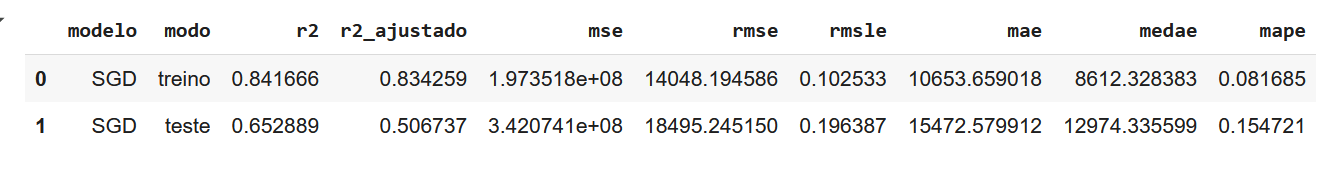

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [45]:
sgd_model = Pipeline(steps=[
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler())),
    ('sgrd', SGDRegressor(random_state=42))
])
sgd_model.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler())),
                ('sgrd', SGDRegressor(random_state=42))])

In [46]:
sgd_results = log_results(sgd_model, 'SGDRegressor', X_train, X_test, y_train, y_test)
sgd_results

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,SGDRegressor,0.841241,0.833814,1.978813e+08,14067.029438,0.102669,10644.306663,8738.889738,8.157804
1,Teste,SGDRegressor,0.653732,0.507935,3.412436e+08,18472.779547,0.196198,15430.438473,13002.318383,15.450226


## Decision Tree

**`Q10`**  Treine uma Decision Tree para o conjunto de treino e salve na variável `tree_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `tree_results`.

Utilize os parâmetros `random_state=30` e `max_depth=3`.

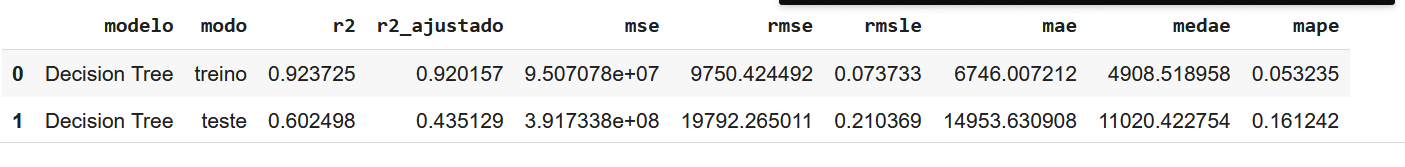

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
#Criando o pipeline com StandardScaler e DecisionTreeRegressor com os parâmetros especificados
tree_model = Pipeline(steps=[
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler())),
    ('model', DecisionTreeRegressor(random_state=30, max_depth=3))
])

In [49]:
tree_model.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler())),
                ('model', DecisionTreeRegressor(max_depth=3, random_state=30))])

In [50]:
# Avaliando o modelo usando a função log_results
tree_results = log_results(
    modelo_objeto=tree_model,
    nome_modelo="Decision Tree",
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

In [51]:
# Visualizando os resultados
print("\nResultados das métricas para Decision Tree:")
print(tree_results)


Resultados das métricas para Decision Tree:
  Conjunto         Modelo        R²  R² Ajustado           MSE          RMSE  \
0   Treino  Decision Tree  0.923725     0.920157  9.507078e+07   9750.424492   
1    Teste  Decision Tree  0.602498     0.435129  3.917338e+08  19792.265011   

      RMSLE           MAE         MedAE       MAPE  
0  0.073733   6746.007212   4908.518958   5.323489  
1  0.210369  14953.630908  11020.422754  16.124220  


## Random Forest

**`Q11`** Treine uma Random Forest para o conjunto de treino e salve na variável `rf_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `rf_results`.

Utilize os parâmetros `random_state=30` e `max_depth=3`.

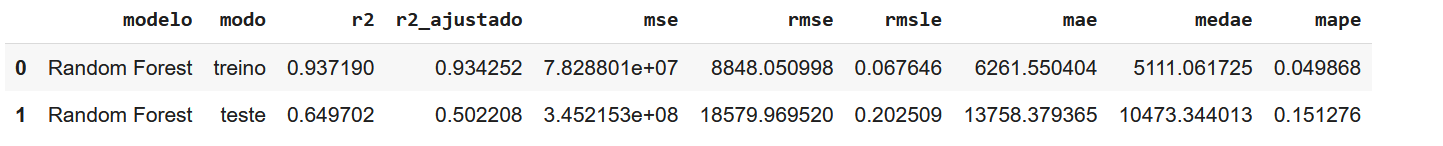

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_model = RandomForestRegressor(random_state=30, max_depth=3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=30)

In [54]:
rf_results = log_results(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)
rf_results

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,Random Forest,0.937190,0.934252,7.828801e+07,8848.050998,0.067646,6261.550404,5111.061725,4.986827
1,Teste,Random Forest,0.649702,0.502208,3.452153e+08,18579.969520,0.202509,13758.379365,10473.344013,15.127622


## LGBM

**`Q12`** Treine um LighGBM para o conjunto de treino e salve na variável `lgbm_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `lgbm_results`.

Utilize os parâmetros `random_state=30`

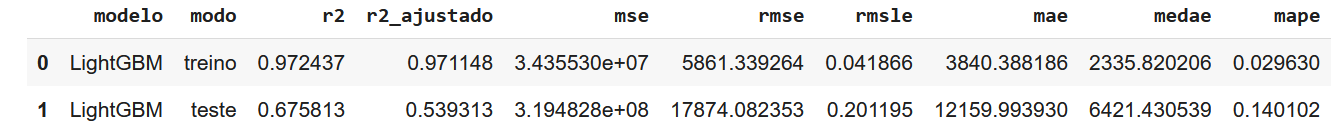

In [55]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 5.4 MB/s eta 0:00:00


In [56]:
from lightgbm import LGBMRegressor

In [57]:
lgbm_model = LGBMRegressor(random_state=30)
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 180, number of used features: 8
[LightGBM] [Info] Start training from score 128914.462934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

LGBMRegressor(random_state=30)

In [58]:
lgbm_results = log_results(lgbm_model, 'LighGBM', X_train, X_test, y_train, y_test)
lgbm_results

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,LighGBM,0.972437,0.971148,3.435530e+07,5861.339264,0.041866,3840.388186,2335.820206,2.962991
1,Teste,LighGBM,0.675813,0.539313,3.194828e+08,17874.082353,0.201195,12159.993930,6421.430539,14.010187


## XGBoost

**`Q13`** Treine um XGBoost para o conjunto de treino e salve na variável `xgb_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `xgb_results`.

Utilize os parâmetros `random_state=30`



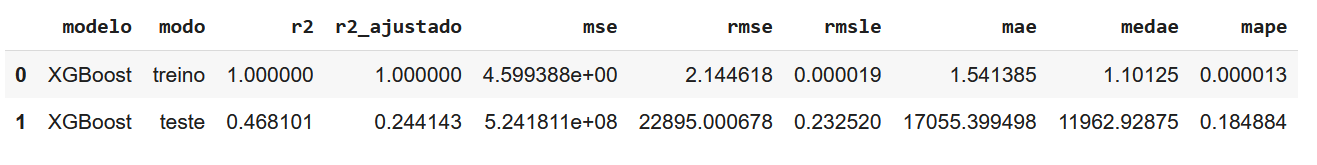

In [59]:
!pip install scikit-learn==1.4.0

  Using cached scikit_learn-1.4.0-1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.0-1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [60]:
from xgboost import XGBRegressor

In [61]:
xgb_model = XGBRegressor(random_state=30)
xgb_model.fit(X_train, y_train)
xgb_results = log_results(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test)
xgb_results

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,XGBoost,1.000000,1.000000,4.599388e+00,2.144618,0.000019,1.541385,1.10125,0.001295
1,Teste,XGBoost,0.468101,0.244143,5.241811e+08,22895.000678,0.232520,17055.399498,11962.92875,18.488362


## CatBoost

**`Q14`** Treine um CatBoost para o conjunto de treino e salve na variável `cat_model`. Avalie os resultados na base de treino e na base de teste utilizando a função `log_results` desenvolvida anteriormente e salve o retorno da função na variável `cat_results`.

Utilize os parâmetros `random_state=30`

PS: não esqueça de executar a linha para instalar a biblioteca `catboost`.

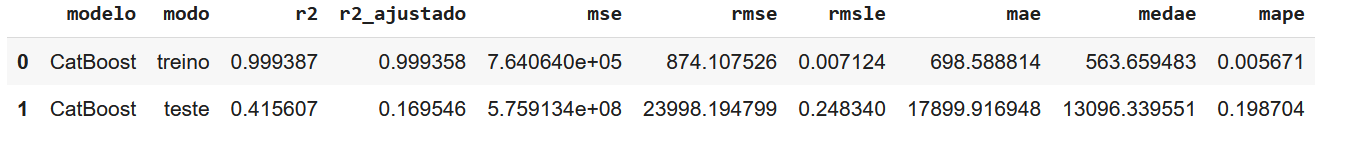

In [62]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [63]:
from catboost import CatBoostRegressor

In [64]:
cat_model = CatBoostRegressor(random_state=30)
cat_model.fit(X_train, y_train)
cat_results = log_results(cat_model, 'CatBoost', X_train, X_test, y_train, y_test)
cat_results

Learning rate set to 0.031226
0:	learn: 34499.0234542	total: 61.6ms	remaining: 1m 1s
1:	learn: 33929.9537555	total: 64ms	remaining: 31.9s
2:	learn: 33216.4337194	total: 65.7ms	remaining: 21.8s
3:	learn: 32579.8546333	total: 75ms	remaining: 18.7s
4:	learn: 31891.9099547	total: 77.3ms	remaining: 15.4s
5:	learn: 31292.5845907	total: 79.1ms	remaining: 13.1s
6:	learn: 30798.3003848	total: 87.6ms	remaining: 12.4s
7:	learn: 30159.2123764	total: 90.2ms	remaining: 11.2s
8:	learn: 29562.9610670	total: 93.6ms	remaining: 10.3s
9:	learn: 28945.8226581	total: 102ms	remaining: 10.1s
10:	learn: 28374.6153661	total: 104ms	remaining: 9.35s
11:	learn: 27835.5055059	total: 114ms	remaining: 9.42s
12:	learn: 27276.9738649	total: 117ms	remaining: 8.85s
13:	learn: 26733.9733990	total: 119ms	remaining: 8.39s
14:	learn: 26215.5333189	total: 126ms	remaining: 8.25s
15:	learn: 25735.0649252	total: 131ms	remaining: 8.06s
16:	learn: 25226.4577166	total: 136ms	remaining: 7.86s
17:	learn: 24787.9116360	total: 141ms	re

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,CatBoost,0.999387,0.999358,7.640640e+05,874.107526,0.007124,698.588814,563.659483,0.567061
1,Teste,CatBoost,0.415607,0.169546,5.759134e+08,23998.194799,0.248340,17899.916948,13096.339551,19.870430


## Juntando todos os resultados

**`Q15`** Consolide todos os resultados acima em uma única tabela. Dica: use a função `pd.concat()`.

In [65]:
model_results=pd.concat([lr_results, sgd_results, tree_results, rf_results, lgbm_results, xgb_results, cat_results])

In [66]:
model_results

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,Regressão Linear,0.851830,0.844898,1.846833e+08,13589.823475,0.102354,10438.198114,8183.734656,8.140689
1,Teste,Regressão Linear,0.545792,0.354547,4.476170e+08,21156.961622,0.221724,18787.508466,16495.304482,17.620975
0,Treino,SGDRegressor,0.841241,0.833814,1.978813e+08,14067.029438,0.102669,10644.306663,8738.889738,8.157804
1,Teste,SGDRegressor,0.653732,0.507935,3.412436e+08,18472.779547,0.196198,15430.438473,13002.318383,15.450226
0,Treino,Decision Tree,0.923725,0.920157,9.507078e+07,9750.424492,0.073733,6746.007212,4908.518958,5.323489
1,Teste,Decision Tree,0.602498,0.435129,3.917338e+08,19792.265011,0.210369,14953.630908,11020.422754,16.124220
0,Treino,Random Forest,0.937190,0.934252,7.828801e+07,8848.050998,0.067646,6261.550404,5111.061725,4.986827
1,Teste,Random Forest,0.649702,0.502208,3.452153e+08,18579.969520,0.202509,13758.379365,10473.344013,15.127622
0,Treino,LighGBM,0.972437,0.971148,3.435530e+07,5861.339264,0.041866,3840.388186,2335.820206,2.962991
1,Teste,LighGBM,0.675813,0.539313,3.194828e+08,17874.082353,0.201195,12159.993930,6421.430539,14.010187


**`Q16`** Qual o modelo que apresentou o melhor R2 ajustado na base de treino?

In [66]:
O modelo XGBoost apresentou o melhor resultado. Valor igual a 1.

**`Q17`** Qual o modelo que apresentou o melhor R2 ajustado na base de teste?

In [ ]:
O modelo do LighGBM com valor igual a 0.539313

**`Q18`** Qual o modelo que devemos considerar para realizar as otimizações e por que?

Devemos considerar o LightGBM como o modelo base para realizar as otimizações

#OS COMENTÁRIOS ABAIXO SÃO PARA ESTUDO DO ALUNO. APENAS ISSO.
#Analisando os resultados, devemos considerar o LightGBM como o modelo base para realizar as otimizações pelos seguintes motivos:

#Melhor Equilíbrio entre Performance e Generalização:

#A diferença entre treino e teste, embora presente, é menos severa que nos outros modelos


#Métricas de Erro mais Consistentes:

#RMSE no teste (17874.08) é competitivo com outros modelos
#MAPE no teste (14.01%) é um dos menores entre todos os modelos
#MedAE no teste (6421.43) é relativamente baixo, indicando boa performance em predições medianas

#Vantagens em Relação aos Concorrentes:


#XGBoost e CatBoost mostram overfitting severo (R² treino próximo de 1.0 vs R² teste muito baixo)
#Random Forest e Decision Tree têm performance inferior no conjunto de teste
#Regressão Linear e SGDRegressor têm capacidade preditiva mais limitada

#Potencial para Otimização:


#O LightGBM tem vários hiperparâmetros que podem ser ajustados para melhorar ainda mais a generalização
#Suporta bem features categóricas e numéricas
#É eficiente computacionalmente, permitindo mais iterações de otimização no mesmo tempo

#Estratégias de otimização que podemos explorar no LightGBM:

#Ajuste do número de árvores e profundidade máxima
#Implementação de early stopping
#Ajuste dos parâmetros de regularização
#Experimentar diferentes learning rates
#Cross-validation para validação mais robusta

**[RESPOSTA]**

# Otimização dos hiperparâmetros

## Grid Search do Melhor Modelo

**`Q19`** Realize um grid search do melhor modelo de acordo com o R2 ajustado na base de teste.

Escolha pelo menos 5 hiperparâmetros para serem otimizados. Cada um desses hiperparâmetros deverá testar ao menos dois valores.

Para identificar os hiperparâmetros veja na documentação - https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

Utilize o `random_state=30`.

**Os parâmetros do `GridSearchCV` fica a seu critério.**

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [69]:
param_grid = {
    'n_estimators': [100, 500, 1000],      # Número de árvores
    'learning_rate': [0.01, 0.1, 0.3],     # Taxa de aprendizado
    'max_depth': [3, 5, 10],               # Profundidade máxima da árvore
    'num_leaves': [10, 20, 40],            # Número de folhas
    'min_child_samples': [10, 20, 50]      # Número mínimo de amostras em uma folha
}

In [76]:
grid_search = GridSearchCV(
    lgbm_model,
    param_grid,
    cv=5,  # Validação cruzada 5-fold
    scoring = make_scorer (calcular_r2_ajustado, greater_is_better=True, X=X_train),
    verbose=1,
    n_jobs=-1
)


In [80]:
best_model = grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 180, number of used features: 8
[LightGBM] [Info] Start training from score 128914.462934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan

In [82]:
best_model = grid_search.best_estimator_
best_model

LGBMRegressor(learning_rate=0.01, max_depth=3, min_child_samples=10,
              num_leaves=10, random_state=30)

In [83]:
y_test_pred = best_model.predict(X_test)
log_results(best_model, 'LGBMTunado', X_train, X_test, y_train, y_test)

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,LGBMTunado,0.800431,0.791094,2.487488e+08,15771.773802,0.124423,12968.572831,12854.440780,10.711241
1,Teste,LGBMTunado,0.608776,0.444049,3.855475e+08,19635.364459,0.222063,13577.478124,9898.606613,15.797027


**`Q20`** Veja se o melhor modelo tunado apresenta uma melhor performance do que o modelo original. Faça as considerações sobre os resultados obtidos.

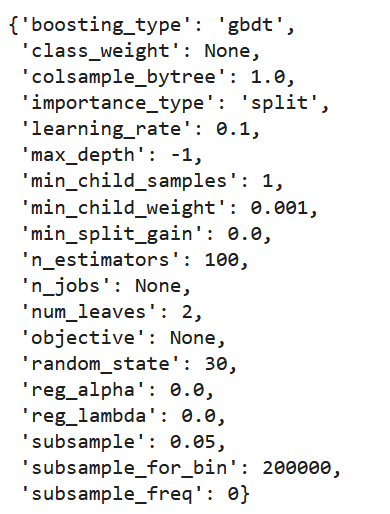

In [84]:
log_results(best_model, 'LGBMTunado', X_train, X_test, y_train, y_test)

,Conjunto,Modelo,R²,R² Ajustado,MSE,RMSE,RMSLE,MAE,MedAE,MAPE
0,Treino,LGBMTunado,0.800431,0.791094,2.487488e+08,15771.773802,0.124423,12968.572831,12854.440780,10.711241
1,Teste,LGBMTunado,0.608776,0.444049,3.855475e+08,19635.364459,0.222063,13577.478124,9898.606613,15.797027


In [73]:
best_model = grid_search.best_estimator_
best_model

NameError: name 'grid_search' is not defined

**[RESPOSTA]**

## Feature Importance

**`Q21`** Quais são as duas features mais importantes do melhor modelo? Crie um gráfico de barras na horizontal com a feature mais importante no topo e a menos importante na base do gráfico.

In [ ]:
pd.Series(lgbm_model.feature_importances_, index=X_train.columns.tolist()).sort_values(ascending=True).plot(kind='barh');

**[RESPOSTA]**

## Shap Values

**`Q22`** Execute as linhas de código abaixo e interprete o gráfico `shap values`.

In [ ]:
pip install shap

In [ ]:
X_test.shape

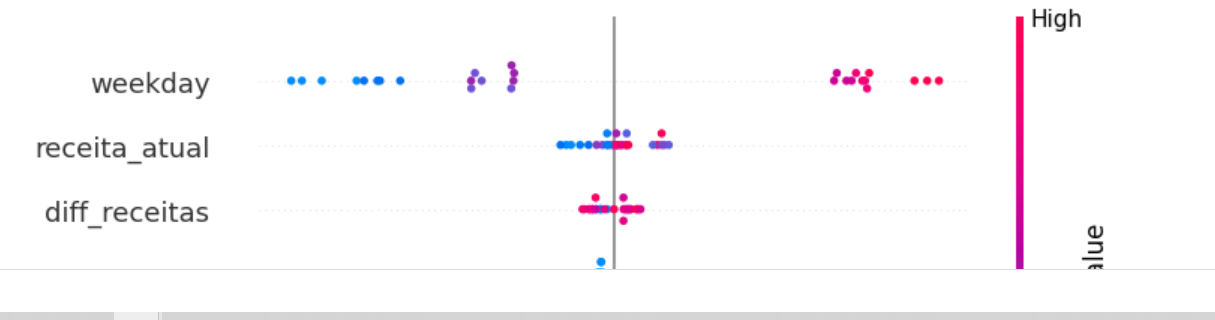